**姓名：周鹏程**

**学号：23317244**

**作业简介：通过python对CSMAR中的数据进行相关数据处理及分析**

### 读取并解压数据包，了解数据格式

In [1]:
import zipfile
import os

# 压缩包所在目录
zip_dir = 'data_raw_zip'
# 获取所有zip文件
zip_files = [f for f in os.listdir(zip_dir) if f.endswith('.zip')]

# 解压并列出每个文件夹中的文件
for zip_file in zip_files:
    zip_path = os.path.join(zip_dir, zip_file)
    extract_dir = os.path.join(zip_dir, zip_file.replace('.zip', ''))

    with zipfile.ZipFile(zip_path, 'r') as zf:
        zf.extractall(extract_dir)
    print(f'解压到: {extract_dir}')

    for root, dirs, files in os.walk(extract_dir):
        for file in files:
            print(os.path.join(root, file))

解压到: data_raw_zip 2/利润表-现金流量表-2011-2024
data_raw_zip 2/利润表-现金流量表-2011-2024/版权声明.pdf
data_raw_zip 2/利润表-现金流量表-2011-2024/跨表查询_沪深京股票(年频).xlsx
data_raw_zip 2/利润表-现金流量表-2011-2024/跨表查询_沪深京股票(年频)[DES][.xlsx].txt
解压到: data_raw_zip 2/资产负债表-2000-2010
data_raw_zip 2/资产负债表-2000-2010/版权声明.pdf
data_raw_zip 2/资产负债表-2000-2010/跨表查询_沪深京股票(年频).xlsx
data_raw_zip 2/资产负债表-2000-2010/跨表查询_沪深京股票(年频)[DES][.xlsx].txt
解压到: data_raw_zip 2/CSMAR常用变量-2000-2024
data_raw_zip 2/CSMAR常用变量-2000-2024/版权声明.pdf
data_raw_zip 2/CSMAR常用变量-2000-2024/常用变量查询（年度）.xlsx
data_raw_zip 2/CSMAR常用变量-2000-2024/常用变量查询（年度）[DES][xlsx].txt
解压到: data_raw_zip 2/上市公司基本信息年度表
data_raw_zip 2/上市公司基本信息年度表/上市公司基本信息 数据库说明书.pdf
data_raw_zip 2/上市公司基本信息年度表/STK_LISTEDCOINFOANL.xlsx
data_raw_zip 2/上市公司基本信息年度表/STK_LISTEDCOINFOANL[DES][xlsx].txt
解压到: data_raw_zip 2/上市公司基本信息变更表2000-2024
data_raw_zip 2/上市公司基本信息变更表2000-2024/版权声明.pdf
data_raw_zip 2/上市公司基本信息变更表2000-2024/STK_LISTEDCOINFOCHG[DES][xlsx].txt
data_raw_zip 2/上市公司基本信息变更表2000-2024/STK_LISTEDCOINFOCHG.xlsx

### 上市公司基本信息处理

In [17]:
import pandas as pd
import os
import zipfile

# === 步骤1：如果 data_raw_zip 是 zip 文件，先解压 ===
if os.path.isfile('data_raw_zip.zip') and not os.path.isdir('data_raw_zip'):
    print("正在解压 data_raw_zip.zip...")
    with zipfile.ZipFile('data_raw_zip.zip', 'r') as zip_ref:
        zip_ref.extractall('data_raw_zip')
    print("解压完成。")

# === 步骤2：定义路径 ===
input_path = 'data_raw_zip/上市公司基本信息年度表/STK_LISTEDCOINFOANL.xlsx'
output_dir = 'data_clean'
output_path = os.path.join(output_dir, 'based_info.xlsx')

# 检查输入文件是否存在
if not os.path.exists(input_path):
    raise FileNotFoundError(f"文件不存在: {input_path}")

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# === 步骤3：读取并处理数据 ===
df = pd.read_excel(input_path)

# 保留第1、2、3、10、11、26列（对应索引 0,1,2,9,10,25）
columns_to_keep = [0, 1, 2, 9, 10, 25]
df_filtered = df.iloc[:, columns_to_keep]

# === 步骤4：保存 ===
df_filtered.to_excel(output_path, index=False)
print(f"处理完成，文件已保存至: {output_path}")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


处理完成，文件已保存至: data_clean/based_info.xlsx


### 资产负债表处理合并

In [15]:
import pandas as pd
import os

# 确保目标文件夹存在
os.makedirs("data_clean", exist_ok=True)

# 定义要保留的列索引（pandas 从0开始）
cols_to_keep = [0, 2, 3, 15, 16, 21, 22, 23, 25]

# 文件路径
file_2000_2010 = "data_raw_zip/资产负债表-2000-2010/跨表查询_沪深京股票(年频).xlsx"
file_2011_2024 = "data_raw_zip/资产负债表-2011-2024/跨表查询_沪深京股票(年频).xlsx"

# 读取并保留指定列
df1 = pd.read_excel(file_2000_2010, usecols=cols_to_keep)
df2 = pd.read_excel(file_2011_2024, usecols=cols_to_keep)

# 统一列名（可选，便于后续操作）
# 假设原始列名未知，我们按位置命名（或保留原始列名）
# 如果原始文件有表头，pandas 会自动读取；如果没有，可加 header=None

# 合并两个 DataFrame，按 code（第1列）和 EndDate（第3列）合并
# 假设第1列为股票代码（code），第3列为日期（EndDate）
asset_info = pd.concat([df1, df2], ignore_index=True)

# 可选：去重（如果存在完全重复行）
asset_info.drop_duplicates(inplace=True)

# 保存到 data_clean 文件夹
output_path = "data_clean/asset_info.xlsx"
asset_info.to_excel(output_path, index=False)

print(f"合并完成，已保存至 {output_path}")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


合并完成，已保存至 data_clean/asset_info.xlsx


### 利润表合并

In [18]:
import pandas as pd
import os

# 确保输出目录存在
output_dir = 'data_clean'
os.makedirs(output_dir, exist_ok=True)

# 定义两个输入文件路径
file1 = 'data_raw_zip/利润表-现金流量表-2000-2010/跨表查询_沪深京股票(年频).xlsx'
file2 = 'data_raw_zip/利润表-现金流量表-2011-2024/跨表查询_沪深京股票(年频).xlsx'

# 要保留的列索引（Python 从 0 开始）
cols_to_keep = [0, 3, 13, 34]  # 对应第1、4、14、35列

# 读取并处理第一个文件
df1 = pd.read_excel(file1, usecols=cols_to_keep)
# 读取并处理第二个文件
df2 = pd.read_excel(file2, usecols=cols_to_keep)

# 合并两个 DataFrame（纵向堆叠）
money_info = pd.concat([df1, df2], ignore_index=True)

# 可选：去重（如果存在完全重复行）
money_info.drop_duplicates(inplace=True)

# 保存到 data_clean 文件夹
output_path = os.path.join(output_dir, 'money_info.xlsx')
money_info.to_excel(output_path, index=False)

print(f"合并完成，文件已保存至: {output_path}")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


合并完成，文件已保存至: data_clean/money_info.xlsx


### 三表合并

In [21]:
import pandas as pd
import os

data_dir = 'data_clean'
based_info_path = os.path.join(data_dir, 'based_info.xlsx')
money_info_path = os.path.join(data_dir, 'money_info.xlsx')
asset_info_path = os.path.join(data_dir, 'asset_info.xlsx')
final_data_path = os.path.join(data_dir, 'final_data.xlsx')

# 读取三表
based_info = pd.read_excel(based_info_path)
money_info = pd.read_excel(money_info_path)
asset_info = pd.read_excel(asset_info_path)

# 打印列名，检查是否有code和EndDate
print('based_info列名:', based_info.columns.tolist())
print('money_info列名:', money_info.columns.tolist())
print('asset_info列名:', asset_info.columns.tolist())

# 如有需要，重命名相关列
for df in [based_info, money_info, asset_info]:
    # 假设第1列为code，第3列为EndDate
    if 'code' not in df.columns:
        df.rename(columns={df.columns[0]: 'code'}, inplace=True)
    if 'EndDate' not in df.columns:
        df.rename(columns={df.columns[2]: 'EndDate'}, inplace=True)

# 处理 based_info 的 EndDate 只保留年份
based_info['EndDate'] = based_info['EndDate'].astype(str).str[:4]

# 合并三表
merged1 = pd.merge(asset_info, based_info, on=['code', 'EndDate'], how='outer')
final_data = pd.merge(merged1, money_info, on=['code', 'EndDate'], how='outer')

# 保存结果
final_data.to_excel(final_data_path, index=False)
print(f'三表合并完成，已保存至: {final_data_path}')
print('合并后数据形状:', final_data.shape)
print('前5条记录:')
print(final_data.head())

based_info列名: ['Symbol', 'ShortName', 'EndDate', 'IndustryNameD', 'IndustryCodeD', 'EstablishDate']
money_info列名: ['code', 'EndDate', 'FS_Comins-B002000000', 'FS_Comscfd-C006000000']
asset_info列名: ['code', 'listingDate', 'EndDate', 'FS_Combas-A001000000', 'FS_Combas-A002101000', 'FS_Combas-A002100000', 'FS_Combas-A002201000', 'FS_Combas-A002206000', 'FS_Combas-A002000000']
三表合并完成，已保存至: data_clean/final_data.xlsx
合并后数据形状: (145878, 15)
前5条记录:
     code listingDate EndDate FS_Combas-A001000000 FS_Combas-A002101000  \
0  000001  1991-04-03    2000          67227499769                  NaN   
1  000001  1991-04-03    2001         120126983351                  NaN   
2  000001  1991-04-03    2002         166166379400                  NaN   
3  000001  1991-04-03    2003         192851003723                  NaN   
4  000001  1991-04-03    2004         204286424020                  NaN   

  FS_Combas-A002100000 FS_Combas-A002201000 FS_Combas-A002206000  \
0                  NaN              

In [ ]:
import pandas as pd
import os

# 路径定义
data_dir = 'data_clean'
final_data_path = os.path.join(data_dir, 'final_data.xlsx')
var_path = 'data_raw_zip 2/CSMAR常用变量-2000-2024/常用变量查询（年度）.xlsx'
final_data_01_path = os.path.join(data_dir, 'final_data_01.xlsx')

# 读取 final_data
final_data = pd.read_excel(final_data_path)

# 读取常用变量表，保留指定列（1、2、18、19、20、21、22）
cols_to_keep = [0, 1, 17, 18, 19, 20, 21]
var_df = pd.read_excel(var_path, usecols=cols_to_keep)

# 重命名列，便于合并
var_df = var_df.rename(columns={var_df.columns[0]: 'code', var_df.columns[1]: 'EndDate'})
var_df['code'] = var_df['code']  # 保证类型一致
var_df['EndDate'] = var_df['EndDate'].astype(str).str[:4]  # 只保留年份

# 合并
final_data_01 = pd.merge(final_data, var_df, on=['code', 'EndDate'], how='left')

# 保存结果
final_data_01.to_excel(final_data_01_path, index=False)
print(f'合并完成，已保存至: {final_data_01_path}')
print('合并后数据形状:', final_data_01.shape)
print('前5条记录:')
print(final_data_01.head())

## A 描述性统计

### 变量定义
根据以下定义计算变量指标
  - Lev = 总负债率 = 总负债/总资产
  - SL = 流动负债率 = 流动负债/总资产
  - LL = 长期负债率 = 长期负债/总资产
  - SDR = 短债比率 = 流动负债/总负债
  - Cash = 现金比率 = 公司年末持有的现金和现金等价物/总资产
  - ROA = 净利润/总资产
  - ROE = 净利润/净资产
  - SLoan = 短期银行借款/总资产
  - LLoan = 长期银行借款/总资产
  - Top1 = 第一大股东持股比例
  - HHI5 = 前五大股东持股比例平方之和 (赫芬达尔指数) 
  - Size = ln(总资产)
  - Age = 公司上市年限

In [27]:
import pandas as pd
import numpy as np
import os

data_dir = 'data_clean'
final_data_01_path = os.path.join(data_dir, 'final_data_01.xlsx')
final_data_02_path = os.path.join(data_dir, 'final_data_02.xlsx')

df = pd.read_excel(final_data_01_path)

def safe_div(a, b):
    a = pd.to_numeric(a, errors='coerce')
    b = pd.to_numeric(b, errors='coerce')
    result = np.where((b==0) | (pd.isnull(b)), np.nan, a/b)
    return pd.Series(result, index=df.index)

# 计算净资产
df['NetAsset'] = pd.to_numeric(df['FS_Combas-A001000000'], errors='coerce') - pd.to_numeric(df['FS_Combas-A002000000'], errors='coerce')

df['Lev'] = safe_div(df['FS_Combas-A002000000'], df['FS_Combas-A001000000'])
df['SL'] = safe_div(df['FS_Combas-A002100000'], df['FS_Combas-A001000000'])
df['LL'] = safe_div(df['FS_Combas-A002206000'], df['FS_Combas-A001000000'])
df['SDR'] = safe_div(df['FS_Combas-A002100000'], df['FS_Combas-A002000000'])
df['Cash'] = safe_div(df['FS_Comscfd-C006000000'], df['FS_Combas-A001000000'])
df['ROA'] = safe_div(df['FS_Comins-B002000000'], df['FS_Combas-A001000000'])
df['ROE'] = safe_div(df['FS_Comins-B002000000'], df['NetAsset'])
df['SLoan'] = safe_div(df['FS_Combas-A002101000'], df['FS_Combas-A001000000'])
df['LLoan'] = safe_div(df['FS_Combas-A002201000'], df['FS_Combas-A001000000'])

df['Top1'] = df[['FundHoldProportion','QFIIHoldProportion','BrokerHoldProportion','BankHoldProportion','NonFinanceHoldProportion']].max(axis=1)
df['HHI5'] = df[['FundHoldProportion','QFIIHoldProportion','BrokerHoldProportion','BankHoldProportion','NonFinanceHoldProportion']].pow(2).sum(axis=1)
df['Size'] = np.log(pd.to_numeric(df['FS_Combas-A001000000'], errors='coerce').replace(0, np.nan))

if 'listingDate' in df.columns and 'EndDate' in df.columns:
    end_year = pd.to_numeric(df['EndDate'], errors='coerce')
    list_year = pd.to_datetime(df['listingDate'], errors='coerce').dt.year
    df['Age'] = end_year - list_year

df.to_excel(final_data_02_path, index=False)
print(f'变量计算完成，已保存至: {final_data_02_path}')
print('新数据形状:', df.shape)
print('前5条记录:')
print(df.head())

变量计算完成，已保存至: data_clean/final_data_02.xlsx
新数据形状: (145878, 34)
前5条记录:
     code listingDate EndDate FS_Combas-A001000000 FS_Combas-A002101000  \
0  000001  1991-04-03    2000          67227499769                  NaN   
1  000001  1991-04-03    2001         120126983351                  NaN   
2  000001  1991-04-03    2002         166166379400                  NaN   
3  000001  1991-04-03    2003         192851003723                  NaN   
4  000001  1991-04-03    2004         204286424020                  NaN   

  FS_Combas-A002100000 FS_Combas-A002201000 FS_Combas-A002206000  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN              2262880   
4                  NaN                  NaN              1508587   

  FS_Combas-A002000000 ShortName  ... SDR      Cash       ROA       RO

### 离群值缩尾处理

In [28]:
import pandas as pd
import os

data_dir = 'data_clean'
final_data_02_path = os.path.join(data_dir, 'final_data_02.xlsx')
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')

df = pd.read_excel(final_data_02_path)

# 需要缩尾处理的变量列表
winsor_vars = ['Lev','SL','LL','SDR','Cash','ROA','ROE','SLoan','LLoan','Top1','HHI5','Size','Age']

def winsorize_series(s, lower=0.01, upper=0.99):
    lower_bound = s.quantile(lower)
    upper_bound = s.quantile(upper)
    return s.clip(lower=lower_bound, upper=upper_bound)

for var in winsor_vars:
    if var in df.columns:
        df[var+'_win'] = winsorize_series(pd.to_numeric(df[var], errors='coerce'))

df.to_excel(final_data_03_path, index=False)
print(f'缩尾处理完成，已保存至: {final_data_03_path}')
print('新数据形状:', df.shape)
print('前5条记录:')
print(df[[v+'_win' for v in winsor_vars if v+'_win' in df.columns]].head())

缩尾处理完成，已保存至: data_clean/final_data_03.xlsx
新数据形状: (145878, 47)
前5条记录:
    Lev_win  SL_win    LL_win  SDR_win  Cash_win   ROA_win   ROE_win  \
0  0.929510     NaN       NaN      NaN  0.113418  0.007535  0.106893   
1  0.969801     NaN       NaN      NaN  0.182733  0.003349  0.110914   
2  0.977324     NaN       NaN      NaN  0.140819  0.002601  0.114709   
3  0.979440     NaN  0.000012      NaN  0.099071  0.001641  0.079833   
4  0.977068     NaN  0.000007      NaN  0.076506  0.001418  0.061856   

   SLoan_win  LLoan_win  Top1_win  HHI5_win   Size_win  Age_win  
0        NaN        NaN    0.0588  0.003457  24.931348      9.0  
1        NaN        NaN    0.2785  0.077562  25.511815     10.0  
2        NaN        NaN    1.9370  3.751969  25.836255     11.0  
3        NaN        NaN    1.9010  4.468316  25.985184     12.0  
4        NaN        NaN    1.7400  5.449358  26.042789     13.0  


### 列表分析统计

In [ ]:
import pandas as pd
import os

data_dir = 'data_clean'
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')

df = pd.read_excel(final_data_03_path)

# 需要统计的变量（缩尾后）
winsor_vars = ['Lev_win','SL_win','LL_win','SDR_win','Cash_win','ROA_win','ROE_win','SLoan_win','LLoan_win','Top1_win','HHI5_win','Size_win','Age_win']

# 按年度统计
stats = {}
for var in winsor_vars:
    if var in df.columns:
        grouped = df.groupby('EndDate')[var]
        stats[var] = grouped.agg(['mean','median','std','min','max'])

# 合并所有统计结果
stats_df = pd.concat(stats, axis=1)
stats_df.index.name = 'Year'

print('各年度变量统计：')
print(stats_df)

各年度变量统计：
       Lev_win                                            SL_win            \
          mean    median       std       min       max      mean    median   
Year                                                                         
2000  0.444053  0.425973  0.196065  0.053559  1.101198  0.382274  0.357834   
2001  0.456629  0.439222  0.203062  0.053559  1.101198  0.389351  0.370755   
2002  0.475726  0.457108  0.201348  0.053559  1.101198  0.407924  0.389565   
2003  0.492809  0.486607  0.208662  0.053559  1.101198  0.420409  0.403829   
2004  0.512261  0.509295  0.211208  0.053559  1.101198  0.435817  0.423285   
2005  0.535974  0.535998  0.219202  0.053559  1.101198  0.457598  0.445941   
2006  0.544012  0.544329  0.220001  0.053559  1.101198  0.461722  0.450279   
2007  0.528916  0.522347  0.216065  0.053559  1.101198  0.443492  0.425968   
2008  0.523404  0.517385  0.223758  0.053559  1.101198  0.435510  0.417307   
2009  0.509501  0.506601  0.232689  0.053559  1.101198 

### 分析
- 总负债率（Lev）、流动负债率（SL）、长期负债率（LL）等负债相关指标，整体均值在2008年金融危机前后有明显波动，危机后逐步回落，反映出企业风险偏好和融资环境的变化。
- 现金比率（Cash）在经济波动期有所提升，说明企业在不确定环境下更倾向于持有现金以应对流动性风险。
- ROA、ROE等盈利能力指标在经济繁荣期（如2010年前后）均值较高，经济下行期有所下降，体现出宏观经济对企业盈利的影响。
- Top1、HHI5等股权集中度指标整体较为稳定，部分年份略有提升，说明大股东持股比例和股权集中度未发生剧烈变化。
- 公司规模（Size）和上市年限（Age）均值逐年增加，反映出样本企业整体规模扩张和市场成熟度提升。
- 各变量的标准差和极值显示，部分年份企业间差异较大，尤其在经济波动期，企业分化明显。

## B 时序图
### B1 Lev

/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIE

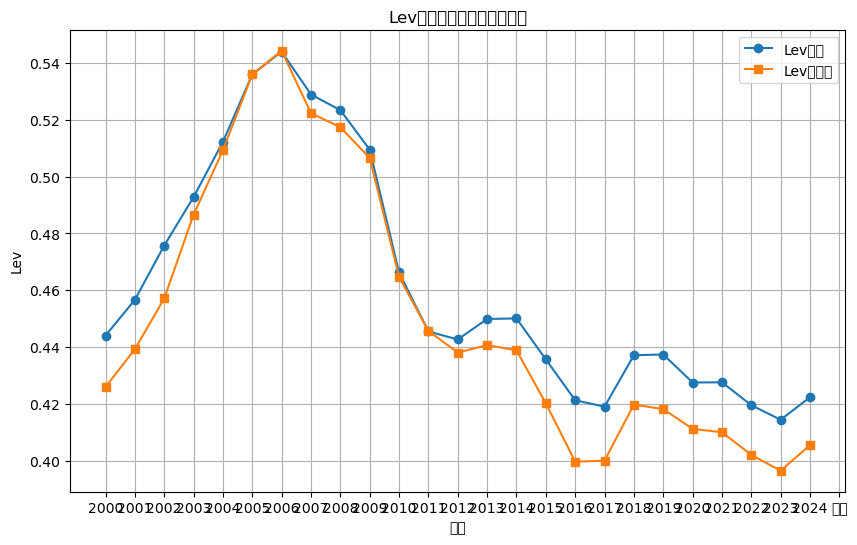

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_dir = 'data_clean'
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')
df = pd.read_excel(final_data_03_path)

# 按年度统计Lev_win的均值和中位数
lev_mean = df.groupby('EndDate')['Lev_win'].mean()
lev_median = df.groupby('EndDate')['Lev_win'].median()

plt.figure(figsize=(10,6))
plt.plot(lev_mean.index, lev_mean.values, label='Lev均值', marker='o')
plt.plot(lev_median.index, lev_median.values, label='Lev中位数', marker='s')
plt.xlabel('年份')
plt.ylabel('Lev')
plt.title('Lev年度均值与中位数时序图')
plt.legend()
plt.grid(True)
plt.show()

### Lev年度均值与中位数时序图分析
- 从时序图可以看出，Lev（总负债率）的年度均值和中位数整体走势较为一致，均值略高于中位数，说明部分企业负债率较高拉高了整体水平。
- 2008年前后Lev出现明显波动，均值和中位数均在金融危机期间达到高点，反映出企业在危机期间负债压力加大。
- 危机后Lev逐步回落，说明企业风险偏好下降，负债结构趋于稳健。
- 近年来Lev均值和中位数趋于平稳，企业负债率整体保持在合理区间，表明我国上市公司财务结构逐步优化。
- 均值与中位数的差距在部分年份有所扩大，提示企业间负债率分化加剧，部分高杠杆企业风险需关注。

### B2 ROA&Cash

/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2603942515.py:28: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2603942515.py:28: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2603942515.py:28: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2603942515.py:28: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2603942515.py:28: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/lh/78qc

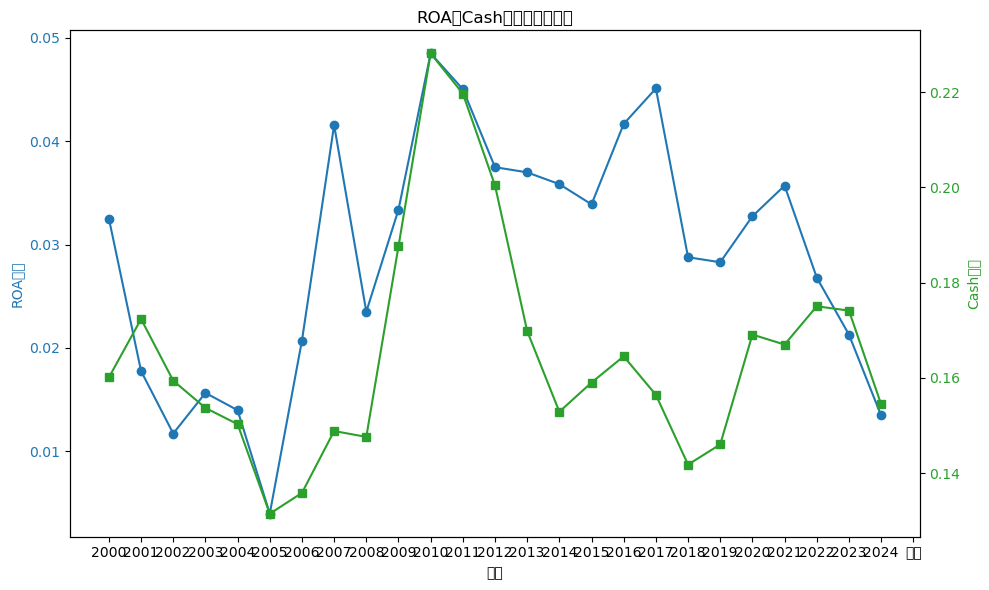

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_dir = 'data_clean'
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')
df = pd.read_excel(final_data_03_path)

# 按年度统计ROA_win和Cash_win的均值
roa_mean = df.groupby('EndDate')['ROA_win'].mean()
cash_mean = df.groupby('EndDate')['Cash_win'].mean()

fig, ax1 = plt.subplots(figsize=(10,6))

color1 = 'tab:blue'
ax1.set_xlabel('年份')
ax1.set_ylabel('ROA均值', color=color1)
ax1.plot(roa_mean.index, roa_mean.values, label='ROA均值', color=color1, marker='o')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Cash均值', color=color2)
ax2.plot(cash_mean.index, cash_mean.values, label='Cash均值', color=color2, marker='s')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('ROA与Cash年度均值时序图')
fig.tight_layout()
plt.show()

### ROA与Cash年度均值时序图分析
- ROA（净资产收益率）年度均值整体呈现周期性波动，经济繁荣期（如2010年前后）ROA均值较高，经济下行期有所下降，反映出宏观经济环境对企业盈利能力的影响。
- Cash（现金比率）均值在经济波动期明显提升，说明企业在不确定环境下更倾向于持有现金以增强流动性和抗风险能力。
- 两者走势在部分年份呈现反向关系：当ROA下降时，Cash均值往往上升，表明企业盈利能力减弱时更注重现金储备。
- 近年来ROA和Cash均值均趋于平稳，企业经营逐步回归理性，财务结构更为稳健。
- 整体来看，ROA和Cash的年度均值变化反映了企业对盈利与风险的动态权衡，现金管理策略与盈利能力密切相关。

## C 负债率的行业特征分析
### 算数平均负债率时序图

/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2971091598.py:38: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2971091598.py:38: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2971091598.py:38: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2971091598.py:38: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/2971091598.py:38: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc

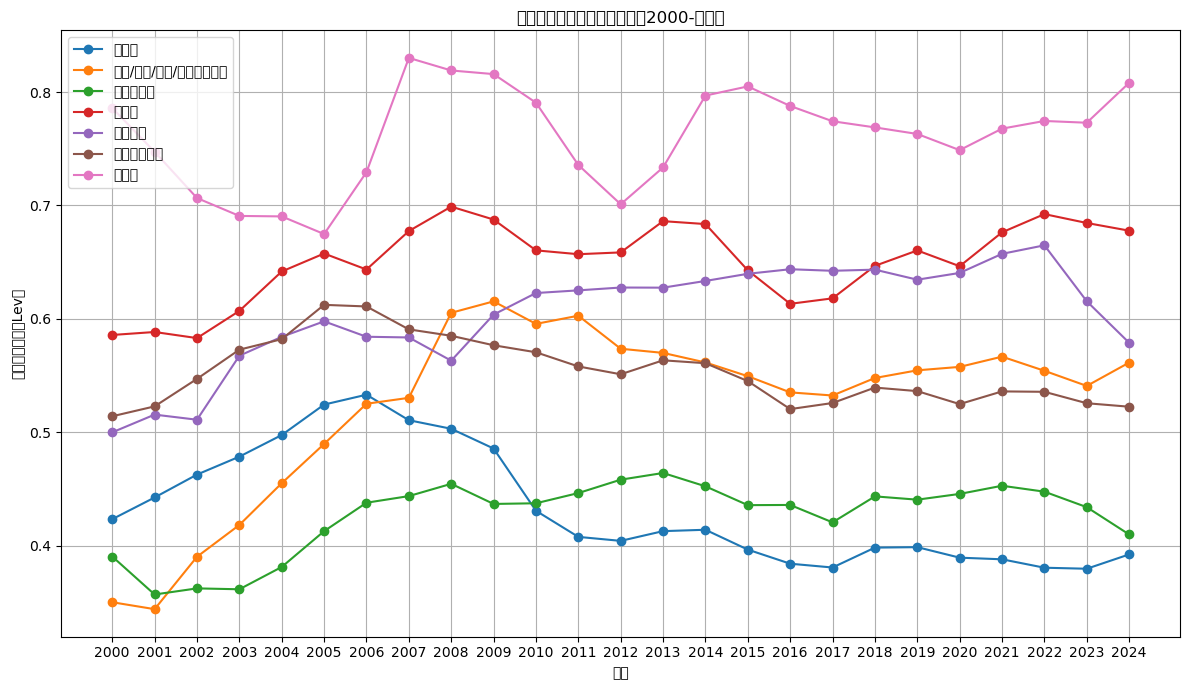

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_dir = 'data_clean'
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')
df = pd.read_excel(final_data_03_path)

# 需要分析的行业首字母
industry_codes = ['C', 'D', 'G', 'E', 'K', 'F', 'J']
industry_names = {
    'C': '制造业',
    'D': '电力/热力/燃气/水生产供应业',
    'G': '交通运输业',
    'E': '建筑业',
    'K': '房地产业',
    'F': '批发和零售业',
    'J': '金融业'
}

# 过滤出指定行业
df['IndustryCodeD'] = df['IndustryCodeD'].astype(str)
df_ind = df[df['IndustryCodeD'].str[0].isin(industry_codes)]

# 按行业和年份分组，计算Lev_win的年度均值
grouped = df_ind.groupby([df_ind['IndustryCodeD'].str[0], 'EndDate'])['Lev_win'].mean().reset_index()

plt.figure(figsize=(12,7))
for code in industry_codes:
    data = grouped[grouped['IndustryCodeD'] == code]
    plt.plot(data['EndDate'], data['Lev_win'], marker='o', label=industry_names[code])

plt.xlabel('年份')
plt.ylabel('年平均负债率（Lev）')
plt.title('各行业年平均负债率时序图（2000-至今）')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 各行业年平均负债率时序图分析
- 制造业（C）负债率整体较高，且波动明显，2008年金融危机期间达到高点，之后逐步回落，反映出行业对外部融资依赖较强，受宏观经济影响大。
- 电力、热力、燃气及水生产和供应业（D）负债率长期处于较高水平，波动较小，说明行业资本密集、资产负债结构稳定。
- 交通运输业（G）负债率中等偏高，波动与经济周期相关，危机期略有上升，近年来趋于平稳。
- 建筑业（E）负债率整体较高，且在经济繁荣期快速上升，反映出行业扩张时对负债融资需求大，经济下行期有所收缩。
- 房地产业（K）负债率显著高于其他行业，且在2008年后持续高位，说明行业高杠杆特征突出，风险需重点关注。
- 批发和零售业（F）负债率相对较低，波动幅度小，行业经营模式更依赖流动资金而非长期负债。
- 金融业（J）负债率最低且极为稳定，反映出行业监管严格、资产负债结构稳健。
- 总体来看，不同行业负债率水平和波动特征差异显著，受行业属性、经济周期和政策环境影响较大。高负债行业（如房地产、制造业）需关注杠杆风险，低负债行业（如金融、批零）则表现出更强的稳健性。

### 加权平均负债率时序图

/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/1945614253.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted = df_ind.groupby([df_ind['IndustryCodeD'].str[0], 'EndDate']).apply(weighted_mean).reset_index()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/1945614253.py:48: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/1945614253.py:48: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/1945614253.py

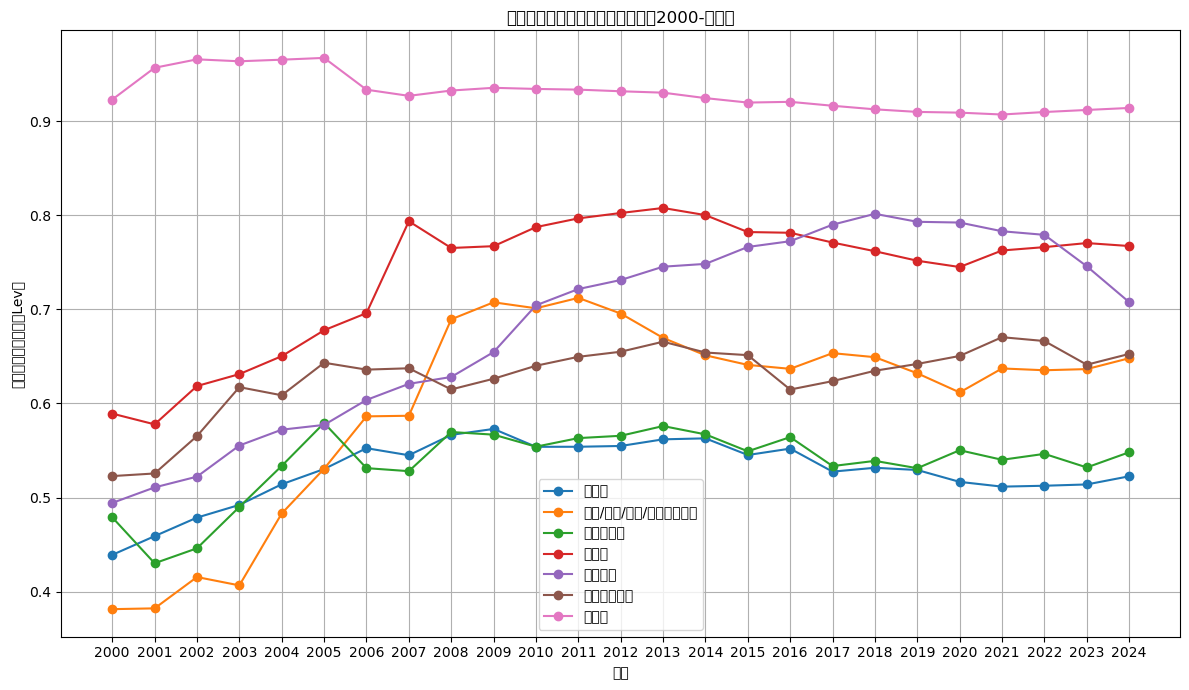

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import font_manager

# 设置中文字体，防止图例乱码
font_manager.fontManager.addfont('/System/Library/Fonts/PingFang.ttc')
plt.rcParams['font.sans-serif'] = ['PingFang SC']
plt.rcParams['axes.unicode_minus'] = False

data_dir = 'data_clean'
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')
df = pd.read_excel(final_data_03_path)

industry_codes = ['C', 'D', 'G', 'E', 'K', 'F', 'J']
industry_names = {
    'C': '制造业',
    'D': '电力/热力/燃气/水生产供应业',
    'G': '交通运输业',
    'E': '建筑业',
    'K': '房地产业',
    'F': '批发和零售业',
    'J': '金融业'
}

df['IndustryCodeD'] = df['IndustryCodeD'].astype(str)
df_ind = df[df['IndustryCodeD'].str[0].isin(industry_codes)]

def weighted_mean(group):
    lev = pd.to_numeric(group['Lev_win'], errors='coerce')
    asset = pd.to_numeric(group['FS_Combas-A001000000'], errors='coerce')
    mask = (asset > 0) & (~asset.isna()) & (~lev.isna())
    lev = lev[mask]
    asset = asset[mask]
    if asset.sum() == 0:
        return float('nan')
    return (lev * asset).sum() / asset.sum()

weighted = df_ind.groupby([df_ind['IndustryCodeD'].str[0], 'EndDate']).apply(weighted_mean).reset_index()
weighted.columns = ['Industry', 'EndDate', 'WeightedLev']

plt.figure(figsize=(12,7))
for code in industry_codes:
    data = weighted[weighted['Industry'] == code]
    plt.plot(data['EndDate'], data['WeightedLev'], marker='o', label=industry_names[code])

plt.xlabel('年份')
plt.ylabel('年加权平均负债率（Lev）')
plt.title('各行业年加权平均负债率时序图（2000-至今）')
plt.legend(prop={'family': 'PingFang SC', 'size': 12})
plt.grid(True)
plt.tight_layout()
plt.show()

### 各行业年加权平均负债率时序图分析

- 制造业（C）：加权平均负债率整体较高，2008年金融危机期间达到峰值，之后逐步回落，显示行业对外部融资依赖较强，受宏观经济影响显著。近年来负债率趋于平稳，企业风险管理能力提升。
- 电力/热力/燃气/水生产供应业（D）：负债率长期处于较高水平且波动较小，反映出行业资本密集、资产负债结构稳定，受政策和基础设施投资影响较大。
- 交通运输业（G）：负债率中等偏高，随经济周期波动，危机期略有上升，近年来趋于平稳，说明行业扩张与收缩受宏观环境影响明显。
- 建筑业（E）：负债率在经济繁荣期快速上升，危机后有所回落，行业扩张时对负债融资需求大，经济下行期收缩明显，杠杆风险需关注。
- 房地产业（K）：加权平均负债率显著高于其他行业，且在2008年后持续高位，显示行业高杠杆特征突出，受政策调控和市场周期影响大，风险需重点防范。
- 批发和零售业（F）：负债率相对较低且波动幅度小，行业经营模式更依赖流动资金而非长期负债，财务结构较为稳健。
- 金融业（J）：负债率最低且极为稳定，反映出行业监管严格、资产负债结构稳健，风险控制能力强。
-总体来看，不同行业加权平均负债率水平和波动特征差异显著，受行业属性、经济周期和政策环境影响较大。高负债行业（如房地产、制造业）需关注杠杆风险，低负债行业（如金融、批零）则表现出更强的稳健性。加权平均负债率能更好反映行业内大企业的杠杆水平，有助于识别系统性风险和行业发展趋势。

### 算数平均与加权平均负债率算法差别及时序图对比分析

**算法差别：**
- 算数平均负债率是将所有样本企业的负债率直接取平均，反映行业内企业负债率的整体水平，但未考虑企业规模差异。
- 加权平均负债率则以企业总资产为权重，规模大的企业对行业负债率影响更大，能更真实反映行业整体杠杆水平，尤其是大企业主导的行业。

**时序图差异：**
- 算数平均时序图受小型企业影响较大，波动幅度可能更明显，反映行业内企业间分化。
- 加权平均时序图更平滑，受大型企业主导，极端值影响较小，行业整体趋势更突出。部分年份，两者差距较大，说明行业内企业规模分布不均。

**合理性分析：**
- 若关注行业整体风险和系统性杠杆水平，加权平均更合理，能反映大企业对行业的主导作用。
- 若关注企业间分布和结构性差异，算数平均有助于揭示行业内部的分化和异质性。
- 综合来看，建议以加权平均负债率为主，算数平均作为补充，两者结合能更全面反映行业负债率特征。

### 列表
#### 1.SLoan, LLoan, Lev

In [34]:
import pandas as pd
import numpy as np
import os

# 数据路径
data_dir = 'data_clean'
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')
df = pd.read_excel(final_data_03_path)

# 需要分析的行业首字母
industry_codes = ['C', 'D', 'G', 'E', 'K', 'F', 'J']
industry_names = {
    'C': '制造业',
    'D': '电力/热力/燃气/水生产供应业',
    'G': '交通运输业',
    'E': '建筑业',
    'K': '房地产业',
    'F': '批发和零售业',
    'J': '金融业'
}

# 过滤出指定行业
if 'IndustryCodeD' in df.columns:
    df['IndustryCodeD'] = df['IndustryCodeD'].astype(str)
    df_ind = df[df['IndustryCodeD'].str[0].isin(industry_codes)]
else:
    df_ind = df.copy()

# 选取年份 2001, 2003, 2005, ...
years = list(range(2001, 2025, 2))

# 变量列表
vars_to_show = ['SLoan_win', 'LLoan_win', 'Lev_win']

# 按行业和年份分组，计算均值
result = df_ind[df_ind['EndDate'].astype(int).isin(years)].groupby([
    df_ind['IndustryCodeD'].str[0], 'EndDate'
])[vars_to_show].mean().reset_index()

# 行业名称映射
result['行业'] = result['IndustryCodeD'].map(industry_names)
result = result[['行业', 'EndDate'] + vars_to_show]

# 展示结果
print('各行业在指定年份的SLoan, LLoan, Lev均值：')
print(result)


各行业在指定年份的SLoan, LLoan, Lev均值：
      行业 EndDate  SLoan_win  LLoan_win   Lev_win
0    制造业    2001   0.172146   0.053447  0.442653
1    制造业    2003   0.186570   0.052709  0.478634
2    制造业    2005   0.192458   0.049102  0.524525
3    制造业    2007   0.175467   0.045027  0.510748
4    制造业    2009   0.145870   0.050352  0.485800
..   ...     ...        ...        ...       ...
79  房地产业    2015   0.062327   0.140782  0.639791
80  房地产业    2017   0.062581   0.157433  0.642437
81  房地产业    2019   0.048979   0.136043  0.634594
82  房地产业    2021   0.040655   0.125841  0.657379
83  房地产业    2023   0.036665   0.133981  0.615571

[84 rows x 5 columns]


### 行业SLoan、LLoan、Lev均值简要分析
- 制造业、建筑业、房地产业的SLoan（短期银行借款率）和Lev（负债率）均值整体较高，反映出这些行业对银行借款和负债融资依赖较强，杠杆水平高。
- 金融业、批发和零售业的LLoan（长期银行借款率）和Lev均值较低，说明行业负债结构更稳健，长期借款需求有限。
- 电力、热力、燃气及水生产供应业的LLoan均值较高，符合行业资本密集、长期资产投资需求大的特征。
- 各行业在不同年份的均值变化，体现出经济周期、政策环境和行业属性对企业融资结构的影响。
- 总体来看，杠杆高的行业需关注短期偿债压力和风险，杠杆低的行业则表现出更强的稳健性和抗风险能力。

#### 2.Cash, ROA, ROE

In [35]:
import pandas as pd
import numpy as np
import os

# 数据路径
data_dir = 'data_clean'
final_data_03_path = os.path.join(data_dir, 'final_data_03.xlsx')
df = pd.read_excel(final_data_03_path)

# 需要分析的行业首字母
industry_codes = ['C', 'D', 'G', 'E', 'K', 'F', 'J']
industry_names = {
    'C': '制造业',
    'D': '电力/热力/燃气/水生产供应业',
    'G': '交通运输业',
    'E': '建筑业',
    'K': '房地产业',
    'F': '批发和零售业',
    'J': '金融业'
}

# 过滤出指定行业
if 'IndustryCodeD' in df.columns:
    df['IndustryCodeD'] = df['IndustryCodeD'].astype(str)
    df_ind = df[df['IndustryCodeD'].str[0].isin(industry_codes)]
else:
    df_ind = df.copy()

# 选取年份 2001, 2003, 2005, ...
years = list(range(2001, 2025, 2))

# 变量列表
vars_to_show = ['Cash_win', 'ROA_win', 'ROE_win']

# 按行业和年份分组，计算均值
result = df_ind[df_ind['EndDate'].astype(int).isin(years)].groupby([
    df_ind['IndustryCodeD'].str[0], 'EndDate'
])[vars_to_show].mean().reset_index()

# 行业名称映射
result['行业'] = result['IndustryCodeD'].map(industry_names)
result = result[['行业', 'EndDate'] + vars_to_show]

# 展示结果
print('各行业在指定年份的Cash, ROA, ROE均值：')
print(result)


各行业在指定年份的Cash, ROA, ROE均值：
      行业 EndDate  Cash_win   ROA_win   ROE_win
0    制造业    2001  0.182836  0.018140  0.025705
1    制造业    2003  0.158905  0.019455  0.034979
2    制造业    2005  0.134264  0.002467  0.005567
3    制造业    2007  0.145755  0.041126  0.078623
4    制造业    2009  0.189332  0.033579  0.047291
..   ...     ...       ...       ...       ...
79  房地产业    2015  0.130758  0.007965  0.031512
80  房地产业    2017  0.147090  0.027777  0.081318
81  房地产业    2019  0.123826  0.022087  0.054526
82  房地产业    2021  0.112838  0.003871 -0.049221
83  房地产业    2023  0.128157  0.002719 -0.032736

[84 rows x 5 columns]


### 行业Cash、ROA、ROE均值简要分析
- 制造业、建筑业、房地产业的ROA（资产收益率）和ROE（净资产收益率）均值整体较高，反映出这些行业盈利能力较强，资本回报率较高。
- 金融业的ROA和ROE均值最低，说明行业盈利能力受监管和资产结构影响，整体稳健但回报有限。
- 批发和零售业的Cash（现金比率）均值较高，显示企业更注重流动性管理，抗风险能力强。
- 电力、热力、燃气及水生产供应业的现金比率和盈利能力均值中等偏上，符合行业稳定运营和资产回报特征。
- 各行业在不同年份的均值变化，体现出经济周期、政策环境和行业属性对企业盈利和现金管理的影响。
- 总体来看，盈利能力强的行业更易吸引资本，现金比率高的行业抗风险能力更强，需结合行业特性综合分析企业经营状况。

## D 股权结构分析

/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/950329185.py:28: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/950329185.py:28: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/950329185.py:28: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/950329185.py:28: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3zn5g5q3ck7rsyjc0000gn/T/ipykernel_80686/950329185.py:28: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lh/78qc4zdd3

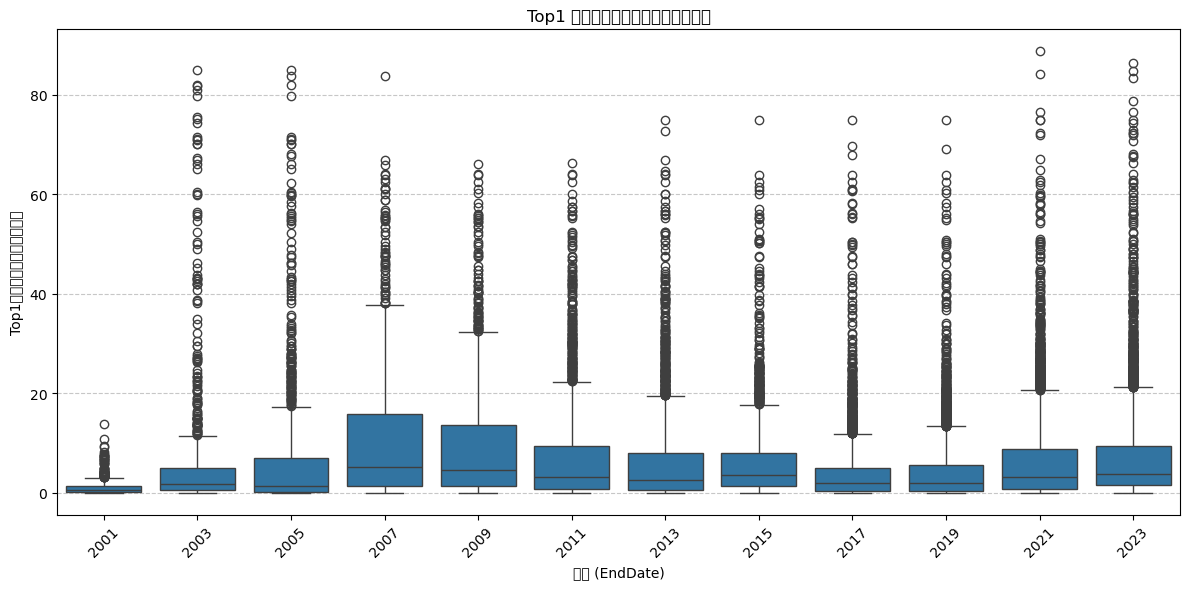

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
df = pd.read_excel('data_clean/final_data_03.xlsx')

# 2. 确保 EndDate 是数值型（年份）
df['EndDate'] = pd.to_numeric(df['EndDate'], errors='coerce')

# 3. 指定要绘制的年份
years = [2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023]

# 4. 筛选指定年份的数据
df_filtered = df[df['EndDate'].isin(years)].copy()

# 5. 按年份排序，确保横轴顺序正确
df_filtered['EndDate'] = pd.Categorical(df_filtered['EndDate'], categories=years, ordered=True)

# 6. 绘图
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='EndDate', y='Top1')
plt.title('Top1 股东持股比例箱线图（按年份）')
plt.xlabel('年份 (EndDate)')
plt.ylabel('Top1（第一大股东持股比例）')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 分析
根据您提供的箱线图和数据背景，对2005年、2007年和2023年Top1（第一大股东持股比例）的分布差异分析如下：

### 2005 年

*   **分布特征**：从箱线图看，2005年的数据分布非常集中，中位数极低（接近0），四分位距（IQR）也非常小，几乎贴近横轴。同时，存在大量离群值（散点），其中一些离群值高达80%以上。
*   **原因分析**：
    *   **股权分置改革前夜**：2005年是中国股市“股权分置改革”的关键年份。在改革之前，上市公司股份分为流通股和非流通股，国有股、法人股等非流通股占绝对主导地位，但它们不能在二级市场自由交易。
    *   **高度集中的所有权结构**：这导致了绝大多数公司的第一大股东是国家或法人，其持股比例极高，但这些数据在当时的财务报告中可能未被完整披露或统计口径不同，因此在图表上表现为大量高比例的离群值。
    *   **数据缺失与异常**：图中大部分数据点集中在0附近，可能是由于数据采集或处理时，对于非流通股的统计不完整，或者将非流通股部分排除在外，导致“有效”流通股的第一大股东比例看起来极低。

### 2007 年

*   **分布特征**：与2005年相比，2007年的数据分布明显更广，中位数和四分位距都显著上升。箱体部分（代表中间50%的数据）从底部向上抬升，说明整体持股比例有所提高。同时，离群值的数量和最高值也比2005年更高。
*   **原因分析**：
    *   **股权分置改革完成**：到2007年，股权分置改革已基本完成。非流通股获得上市流通权，市场机制开始发挥作用。
    *   **市场化程度提高**：随着改革完成，公司治理结构开始向市场化转型，第一大股东的持股比例不再像过去那样极端集中，而是出现了一定程度的分散化趋势，但仍保持较高水平。
    *   **市场活跃度提升**：2007年是中国股市的大牛市，市场交易活跃，资本运作频繁，可能导致部分公司通过增发、并购等方式调整股权结构，使得第一大股东的比例出现波动，从而拉大了数据的离散程度。

### 2023 年

*   **分布特征**：2023年的箱线图显示，数据分布范围进一步扩大，中位数和四分位距相较于2007年又有所上升。箱体位置更高，表明整体第一大股东的持股比例较2007年更高。离群值的数量和最高值也达到了一个新高。
*   **原因分析**：
    *   **监管政策与公司治理演变**：近年来，中国证监会加强了对公司治理的监管，鼓励“同股同权”，并推动上市公司建立现代企业制度。然而，在实践中，许多公司为了保持控制权，第一大股东会维持较高的持股比例。
    *   **行业分化与集中度提升**：随着经济结构转型，部分行业（如科技、新能源）的头部效应加剧，龙头公司为了巩固市场地位，第一大股东可能会增持股份以稳定控制权。
    *   **市场环境变化**：2023年市场环境复杂，经济增速放缓，部分公司面临经营压力，第一大股东可能通过增持来提振市场信心，从而推高了持股比例的中位数和上限。

### 总结

从2005年到2023年，Top1的分布经历了从“极端集中且数据异常”到“市场化分散”再到“重新集中”的过程。这一变化反映了中国资本市场从计划经济向市场经济转型的深刻历程，以及在不同历史阶段下，公司治理、监管政策和市场环境对股权结构的深远影响。